In [ ]:
import pandas as pd
import numpy as np
import random
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [13]:
df1 = pd.read_csv('drugs1.csv')
df2 = pd.read_csv('drugs2.csv')

In [14]:
df1.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,17-May-09,17
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,13-Jan-15,44
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,29-Sep-17,3
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,22-Oct-15,4


In [15]:
df2.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,132258,Ativan,Panic Disorder,"""Honestly, I have been taking ativan for 2 yea...",6,01-Jun-15,47
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Autism,"""I used to take another Depression Medicine, w...",5,14-Dec-09,17
3,29607,Topiramate,Migraine Prevention,"""I have been on this medication almost two wee...",9,01-Jan-15,19
4,138000,Ortho Evra,Autism,"""This is my first time using any form of Autis...",8,03-Nov-15,10


In [16]:
# Combining drugs1 and drugs2 for better analysis
data = pd.concat([df1, df2])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,17-May-09,17
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,13-Jan-15,44
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,29-Sep-17,3
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,22-Oct-15,4


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213645 entries, 0 to 159884
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     213645 non-null  int64 
 1   drugName     213645 non-null  object
 2   condition    213350 non-null  object
 3   review       213645 non-null  object
 4   rating       213645 non-null  int64 
 5   date         213645 non-null  object
 6   usefulCount  213645 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.0+ MB


In [18]:
data.describe()

,uniqueID,rating,usefulCount
count,213645.000000,213645.000000,213645.000000
mean,116050.525971,6.992310,28.115158
std,67009.021353,3.275509,36.406271
min,0.000000,1.000000,0.000000
25%,58114.000000,5.000000,6.000000
50%,115920.000000,8.000000,16.000000
75%,173991.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


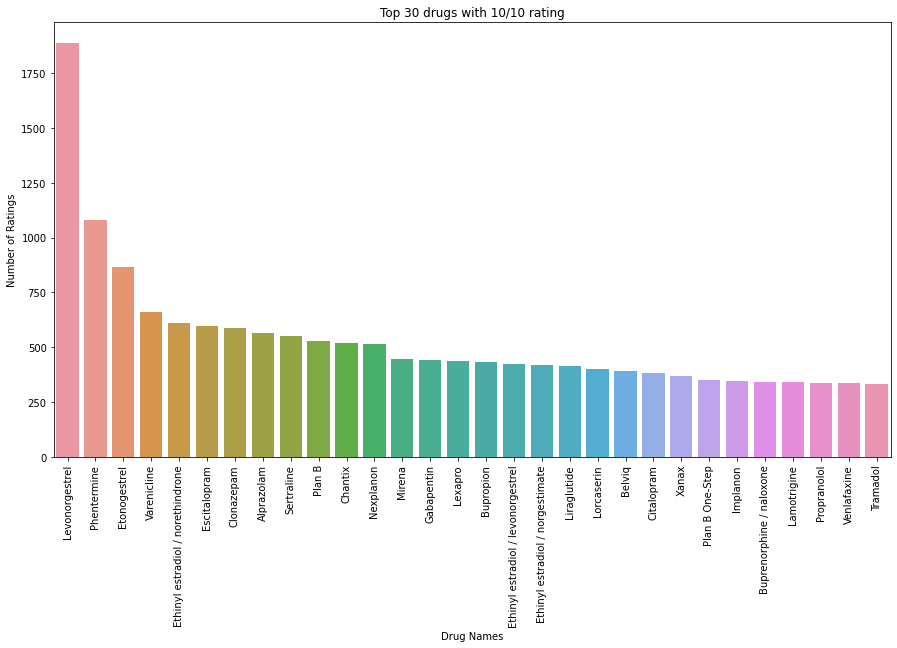

In [19]:
plt.figure(figsize=(15,8))

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts()) 
drugname = list(rating.keys())
drug_rating = list(rating.values())
drug_rating_plot = sns.barplot(x = drugname[0:30], y = drug_rating[0:30])

drug_rating_plot.set_title('Top 30 drugs with 10/10 rating')
drug_rating_plot.set_ylabel("Number of Ratings")
drug_rating_plot.set_xlabel("Drug Names")
drug_rating_plot.set_xticklabels(drug_rating_plot.get_xticklabels(),rotation = 90)
plt.show()

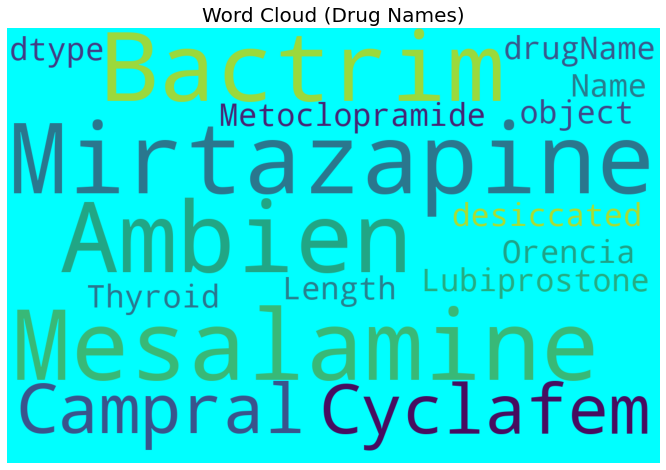

In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'cyan', width = 1200, height = 800).generate(str(data['drugName']))

plt.figure(figsize=(15,8))
plt.title('Word Cloud (Drug Names)', fontsize = 20)
plt.axis('off') 
plt.imshow(wordcloud)
plt.show()

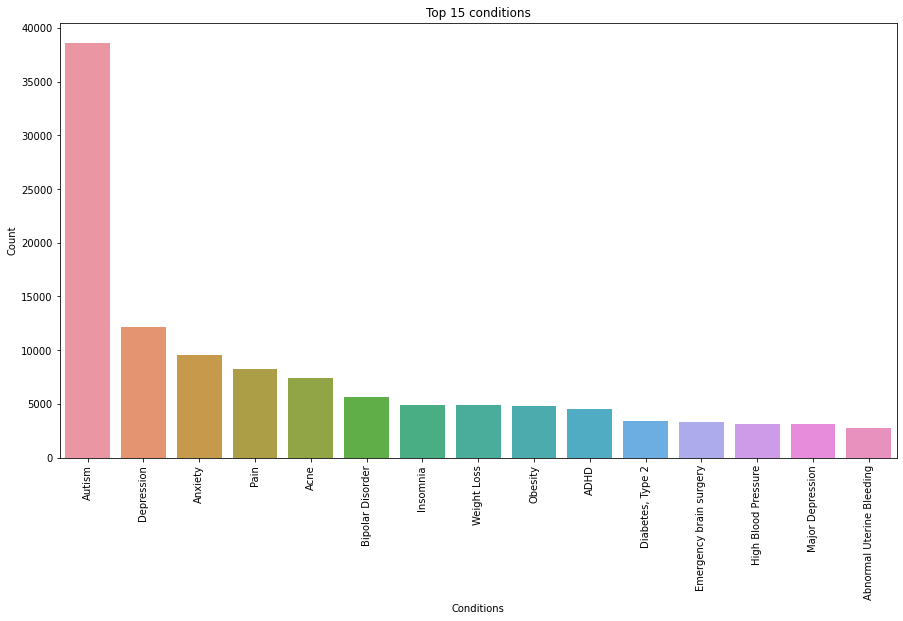

In [22]:
plt.figure(figsize=(15,8))

conditions = dict(data['condition'].value_counts())
condition_name = list(conditions.keys())
values = list(conditions.values())

top_conditions_plot = sns.barplot(x = condition_name[0:15], y = values[0:15])
top_conditions_plot.set_title("Top 15 conditions")
top_conditions_plot.set_xlabel("Conditions")
top_conditions_plot.set_ylabel("Count");
top_conditions_plot.set_xticklabels(top_conditions_plot.get_xticklabels(),rotation = 90)
plt.show()

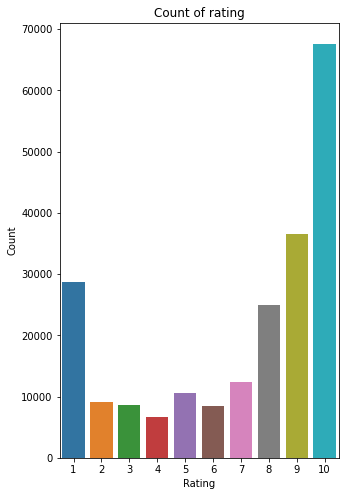

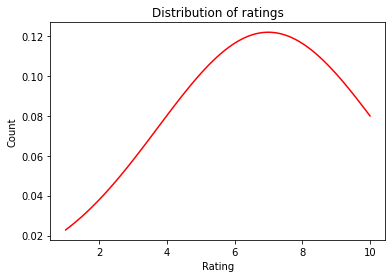

In [23]:
plt.figure(figsize=(5,8))

rating = dict(data['rating'].value_counts())
rating_number = list(rating.keys())
rating_count = list(rating.values())
rating_count_plot = sns.barplot(x = rating_number, y = rating_count)

rating_count_plot.set_title('Count of rating')
rating_count_plot.set_ylabel("Count")
rating_count_plot.set_xlabel("Rating")
rating_count_plot.set_xticklabels(rating_count_plot.get_xticklabels())
plt.show()


ratings = data['rating']
mean = np.mean(ratings)
std = np.std(ratings)

x = np.linspace(min(ratings), max(ratings), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, color='red')
plt.title("Distribution of ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [25]:
data.loc[(data['rating'] >= 5), 'Review Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review Sentiment'] = 0

data['Review Sentiment'].value_counts()

Review Sentiment
1.0    160477
0.0     53168
Name: count, dtype: int64

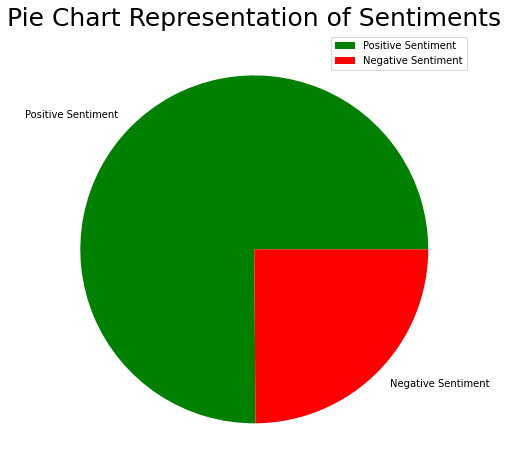

In [26]:
size = [160477, 53168]
colors = ['green', 'red']
labels = "Positive Sentiment","Negative Sentiment"

plt.figure(figsize=(15,8))
plt.pie(size, colors = colors, labels = labels)
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [27]:
data['date'] = pd.to_datetime(data['date'])

# adding year, month and day  
data['Year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data.head()

C:\Users\Keyur\AppData\Local\Temp\ipykernel_23828\230834160.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22


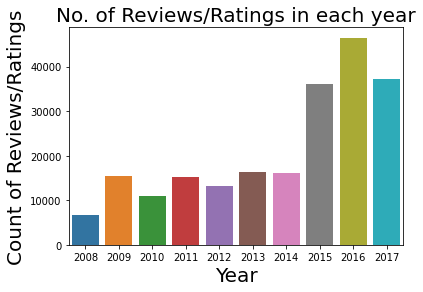

In [28]:
# no. of reviews/rating in each year

rating_review = dict(data['Year'].value_counts())
rating_review_year = list(rating_review.keys())
rating_review_count = list(rating_review.values())

rating_review_count_plot = sns.barplot(x = rating_review_year, y = rating_review_count)
rating_review_count_plot.set_title('No. of Reviews/Ratings in each year',fontsize=20)
rating_review_count_plot.set_ylabel("Count of Reviews/Ratings",fontsize=20)
rating_review_count_plot.set_xlabel("Year",fontsize=20)
rating_review_count_plot.set_xticklabels(rating_review_count_plot.get_xticklabels())

plt.show()

In [32]:
def review_clean(review): 
    reviewclean = review.str.lower()
    reviewclean = reviewclean.str.replace("&#039;", "")
    reviewclean = reviewclean.str.replace(r'[^\w\d\s]',' ',regex=True)
    reviewclean = reviewclean.str.replace(r'[^\x00-\x7F]+',' ',regex=True)
    reviewclean = reviewclean.str.replace(r'^\s+|\s+?$','',regex=True)
    reviewclean = reviewclean.str.replace(r'\s+',' ',regex=True)
    reviewclean = reviewclean.str.replace(r'\.{2,}', ' ',regex=True)
    
    return reviewclean

In [33]:
data['review_clean'] = review_clean(data['review'])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tried a few antidepressants over the years...
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,my son has ptsds disease and has done very wel...
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto on rebound sleepless when discontinued i...
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduction of symptoms
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,i have been on this autism for one cycle after...


In [34]:
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
# from nltk import ngrams
from nltk.stem import SnowballStemmer


#nltk.download()
stop_words = set(stopwords.words('english'))
print(stop_words)
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
data.head()

{'hers', 'it', 'who', "you'll", 'll', 'where', 'such', 'just', "don't", 'again', 'to', 'so', 'didn', 'themselves', 'weren', "should've", 'up', "aren't", 'after', 'their', 'herself', 'very', 'i', 'above', 'you', 'was', 'over', 'yourselves', "shan't", 'have', "weren't", 'few', 'out', 'doesn', 'had', 't', "needn't", 'with', 'as', 'all', 'isn', 'are', 'we', 'below', "didn't", 'won', 'couldn', 'other', 'own', 'hasn', 'he', 'did', 'were', 'hadn', "won't", 'his', 'there', 'further', 'same', "wasn't", "haven't", 'aren', 'itself', "shouldn't", 'for', 'more', 'because', 'be', 'y', 'needn', 'don', "hasn't", 'through', 'my', 'of', 'yours', 'a', 'having', "mightn't", 'her', 'do', 'nor', 'o', "you're", 'd', 'not', 'at', 'both', 'then', 'they', 'and', 'whom', 'between', 'what', 'shouldn', "it's", 'should', 'shan', 'these', 'will', 'them', 'is', 'now', "isn't", 'under', 'those', 'from', 'any', 'ourselves', 'once', 'mightn', 'm', 'mustn', 're', 'wouldn', 'wasn', 'ain', 'theirs', "mustn't", "you've", 'w

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tried antidepressants years citalopram flu...
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,son ptsds disease done well asacol complaints ...
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto rebound sleepless discontinued done stra...
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduction symptoms
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,autism one cycle reading reviews type similar ...


In [35]:
snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(snow_ball.stem(word) for word in x.split()))

In [36]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tri antidepress year citalopram fluoxetin ...
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,son ptsds diseas done well asacol complaint sh...
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto rebound sleepless discontinu done strang...
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduct symptom
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,autism one cycl read review type similar autis...


In [37]:
def sentiment(review):
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [38]:
data['sentiment'] = sentiment(data['review'])

In [39]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [40]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean,sentiment,sentiment_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tri antidepress year citalopram fluoxetin ...,0.000000,-0.122222
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,son ptsds diseas done well asacol complaint sh...,0.566667,-0.300000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto rebound sleepless discontinu done strang...,-0.030000,0.000000
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduct symptom,0.333333,0.333333
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,autism one cycl read review type similar autis...,0.260926,0.205476


In [41]:
data['review_clean_without_removing_ss'] = review_clean(data['review'])
data['sentiment_clean_without_removing_ss'] = sentiment(data['review_clean_without_removing_ss'])

In [42]:
data = data.dropna()
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean,sentiment,sentiment_clean,review_clean_without_removing_ss,sentiment_clean_without_removing_ss
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tri antidepress year citalopram fluoxetin ...,0.000000,-0.122222,ive tried a few antidepressants over the years...,0.000000
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,son ptsds diseas done well asacol complaint sh...,0.566667,-0.300000,my son has ptsds disease and has done very wel...,0.566667
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto rebound sleepless discontinu done strang...,-0.030000,0.000000,ditto on rebound sleepless when discontinued i...,-0.030000
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduct symptom,0.333333,0.333333,quick reduction of symptoms,0.333333
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,autism one cycl read review type similar autis...,0.260926,0.205476,i have been on this autism for one cycle after...,0.234537


In [43]:
import string

data['word_count'] = data["review_clean_without_removing_ss"].apply(lambda x: len(str(x).split())) 
data['unique_word_count'] = data["review_clean_without_removing_ss"].apply(lambda x: len(set(str(x).split())))
data['letters_count']=data["review_clean_without_removing_ss"].apply(lambda x: len(str(x)))
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
data["upper_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
data["title_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
data["stopwords_count"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
data["mean_word_length"] = data["review_clean_without_removing_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [46]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,...,ive tried a few antidepressants over the years...,0.000000,67,53,410,22,2,4,27,5.134328
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,...,my son has ptsds disease and has done very wel...,0.566667,48,39,245,13,0,4,22,4.125000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,...,quick reduction of symptoms,0.333333,4,4,27,2,0,1,1,6.000000
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,...,i have been on this autism for one cycle after...,0.234537,144,88,704,17,10,22,80,3.895833


In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])
data = data.dropna()
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,163740,2161,254,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,...,ive tried a few antidepressants over the years...,0.000000,67,53,410,22,2,4,27,5.134328
1,206473,2072,596,"""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,...,my son has ptsds disease and has done very wel...,0.566667,48,39,245,13,0,4,22,4.125000
2,97013,198,435,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
3,159672,402,118,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,...,quick reduction of symptoms,0.333333,4,4,27,2,0,1,1,6.000000
4,97768,869,138,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,...,i have been on this autism for one cycle after...,0.234537,144,88,704,17,10,22,80,3.895833


In [41]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 12.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC

In [50]:
features = data[['condition', 'usefulCount', 'sentiment',
                   'sentiment_clean_without_removing_ss','sentiment_clean']]

target = data['Review Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("Training data size ", X_train.shape)
print ("Testing data size ", X_test.shape)

Training data size  (149343, 5)
Testing data size  (64005, 5)


In [51]:
accuracy = []
algorithm = []

# Decision Tree

In [52]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=50)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("Decision Tree")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.860370283571596
              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73     16075
         1.0       0.91      0.90      0.91     47930

    accuracy                           0.86     64005
   macro avg       0.81      0.82      0.82     64005
weighted avg       0.86      0.86      0.86     64005

The confusion Matrix is 


array([[11834,  4241],
       [ 4696, 43234]], dtype=int64)

In [54]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=30)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.8436997109600812
              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68     16075
         1.0       0.89      0.91      0.90     47930

    accuracy                           0.84     64005
   macro avg       0.79      0.78      0.79     64005
weighted avg       0.84      0.84      0.84     64005

The confusion Matrix is 


array([[10586,  5489],
       [ 4515, 43415]], dtype=int64)

# LGBM

In [53]:
clf = LGBMClassifier(n_estimators = 10000, learning_rate = 0.10, num_leaves = 30, max_depth = 7,force_col_wise=True, verbose=-1)
model = clf.fit(X_train, y_train)


predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("LGBM")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.8534177017420514
              precision    recall  f1-score   support

         0.0       0.77      0.60      0.67     16075
         1.0       0.87      0.94      0.91     47930

    accuracy                           0.85     64005
   macro avg       0.82      0.77      0.79     64005
weighted avg       0.85      0.85      0.85     64005

The confusion Matrix is 


array([[ 9577,  6498],
       [ 2884, 45046]], dtype=int64)

In [59]:
clf = LGBMClassifier(n_estimators = 10000, learning_rate = 0.10, num_leaves = 50, max_depth = 10,force_col_wise=True, verbose=-1)
model1 = clf.fit(X_train, y_train)


predictions = model1.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.8786032341223342
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74     16075
         1.0       0.90      0.94      0.92     47930

    accuracy                           0.88     64005
   macro avg       0.85      0.82      0.83     64005
weighted avg       0.88      0.88      0.88     64005

The confusion Matrix is 


array([[11062,  5013],
       [ 2757, 45173]], dtype=int64)

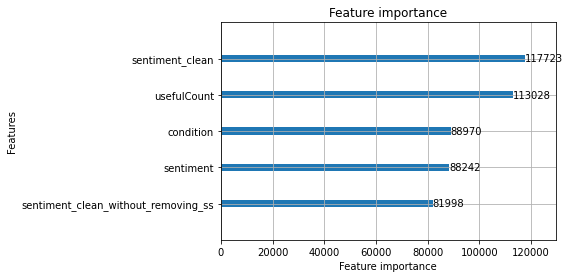

In [60]:
plot_importance(model);

# Naive Bayes

In [61]:
nb = GaussianNB()
nb.fit(X_train, y_train)

predictions = nb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("GaussianNB")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.7478790719475041
              precision    recall  f1-score   support

         0.0       0.50      0.45      0.47     16075
         1.0       0.82      0.85      0.83     47930

    accuracy                           0.75     64005
   macro avg       0.66      0.65      0.65     64005
weighted avg       0.74      0.75      0.74     64005

The confusion Matrix is 


array([[ 7184,  8891],
       [ 7246, 40684]], dtype=int64)

# K-NN

In [62]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)  


classifier= KNeighborsClassifier(n_neighbors=31)  
classifier.fit(x_train, y_train)  
predictions = classifier.predict(x_test)  

print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("K-NN")

print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.7732364659011015
              precision    recall  f1-score   support

         0.0       0.60      0.30      0.40     16075
         1.0       0.80      0.93      0.86     47930

    accuracy                           0.77     64005
   macro avg       0.70      0.62      0.63     64005
weighted avg       0.75      0.77      0.74     64005

The confusion Matrix is 


array([[ 4795, 11280],
       [ 3234, 44696]], dtype=int64)

In [70]:
classifier= KNeighborsClassifier(n_neighbors=463)  
classifier.fit(x_train, y_train)  
predictions = classifier.predict(x_test)  

print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))

print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.7734239512538083
              precision    recall  f1-score   support

         0.0       0.62      0.25      0.35     16075
         1.0       0.79      0.95      0.86     47930

    accuracy                           0.77     64005
   macro avg       0.71      0.60      0.61     64005
weighted avg       0.75      0.77      0.73     64005

The confusion Matrix is 


array([[ 3983, 12092],
       [ 2410, 45520]], dtype=int64)

# Logistic Regression

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

model = LogisticRegression(solver = 'newton-cg')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("Logistic Regression")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.7714241074916022
              precision    recall  f1-score   support

         0.0       0.65      0.19      0.30     16075
         1.0       0.78      0.96      0.86     47930

    accuracy                           0.77     64005
   macro avg       0.72      0.58      0.58     64005
weighted avg       0.75      0.77      0.72     64005

The confusion Matrix is 


array([[ 3133, 12942],
       [ 1688, 46242]], dtype=int64)

# SVM

In [72]:
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("SVM")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.7712991172564644
              precision    recall  f1-score   support

         0.0       0.65      0.20      0.30     16075
         1.0       0.78      0.96      0.86     47930

    accuracy                           0.77     64005
   macro avg       0.71      0.58      0.58     64005
weighted avg       0.75      0.77      0.72     64005

The confusion Matrix is 


C:\Python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[ 3170, 12905],
       [ 1733, 46197]], dtype=int64)

In [75]:
print(accuracy)
print(algorithm)

[0.860370283571596, 0.8534177017420514, 0.7478790719475041, 0.7732364659011015, 0.7714241074916022, 0.7712991172564644]
['Decision Tree', 'LGBM', 'GaussianNB', 'K-NN', 'Logistic Regression', 'SVM']


<BarContainer object of 6 artists>

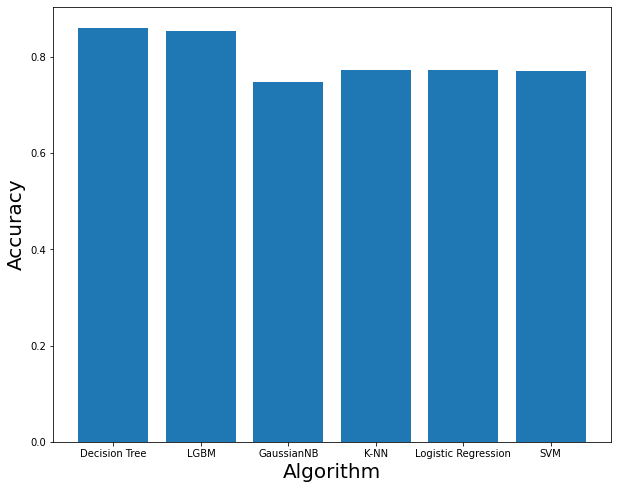

In [76]:
plt.figure(figsize=(10,8))
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.bar(algorithm,accuracy)